# **CUSTOMER SEGMENTATION BASED ON RFM ANALYSIS**

# Recency: How recently a customer has made a purchase. 
# Frequency: How often a customer makes a purchase. 
# Monetary Value: How much money a customer spends on purchases. 

**An e-commerce company wants to segment its customers and determine marketing strategies according to these segments. To this end, we will define the behavior of customers and create groups according to clusters in these behaviors. In other words, we will include those who exhibit common behaviors in the same groups and we will try to develop special sales and marketing techniques for these groups.**



InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-listing/online_retail_listing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

plt.rcParams["figure.figsize"]=[10,5]

In [3]:
df=pd.read_csv("../input/online-retail-listing/online_retail_listing.csv",delimiter=";",encoding="latin-1")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [5]:
df.shape

(1048575, 8)

In [6]:
df.nunique()

Invoice        52961
StockCode       5304
Description     5697
Quantity        1048
InvoiceDate    47046
Price           2784
Customer ID     5924
Country           43
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


**DATA TYPE CONVERSION**

In [8]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [9]:
df["Customer ID"]=df["Customer ID"].astype("object")

In [10]:
def myfunction(column):
    if isinstance(column,str):
        a=column.replace(",",".")
        return a

In [11]:
df["Price"]=df["Price"].apply(myfunction)

In [12]:
df["Price"]

0          6.95
1          6.75
2          6.75
3           2.1
4          1.25
           ... 
1048570    8.25
1048571    4.95
1048572    1.65
1048573    2.89
1048574    6.65
Name: Price, Length: 1048575, dtype: object

In [13]:
df["Price"]=pd.to_numeric(df["Price"])

In [14]:
df["Price"].dtype

dtype('float64')

In [15]:
df.describe()

,Quantity,Price
count,1.048575e+06,1.048575e+06
mean,9.957525e+00,4.627346e+00
std,1.335187e+02,1.228024e+02
min,-7.421500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,7.421500e+04,3.897000e+04


In [16]:
df["Quantity"][df["Quantity"]<0]=0

In [17]:
df["Quantity"].iloc[178]

0

**MISSING VALUES**

In [18]:
Missing=df.isnull().sum()[df.isnull().sum()>0]
Missing

Description      4372
Customer ID    236682
dtype: int64

In [19]:
percent_missing=(Missing/df.shape[0])*100
percent_missing

Description     0.416947
Customer ID    22.571776
dtype: float64

 **0% 22% OF MISSING VALUES SO DROP ROWS**

In [20]:
df=df.dropna(subset=["Description","Customer ID"],axis=0)

In [21]:
df.shape

(811893, 8)

In [22]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

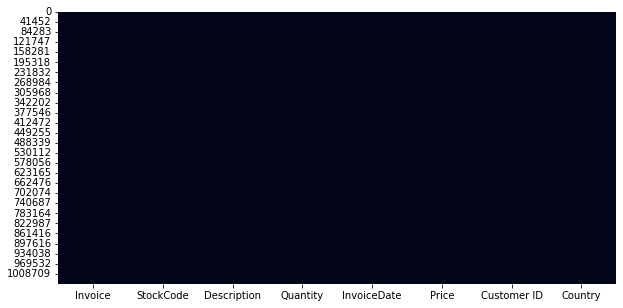

In [23]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

**NUMERICAL COLUMNS**

In [24]:
num_features=df.select_dtypes(include="number")
num_features.columns

Index(['Quantity', 'Price'], dtype='object')

**CATEGORICAL COLUMNS**

In [25]:
cat_features=df.select_dtypes(exclude="number")
cat_features.columns

Index(['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Customer ID',
       'Country'],
      dtype='object')

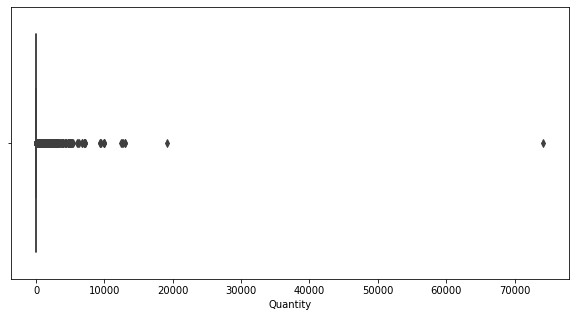

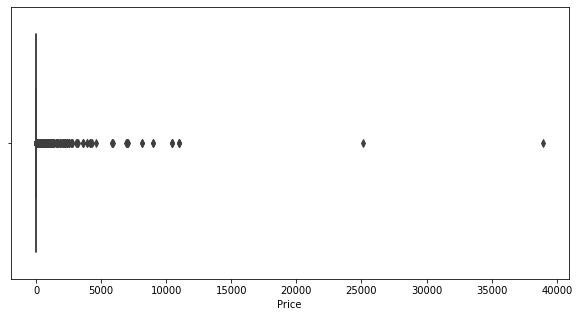

In [26]:
for i in num_features.columns:
    sns.boxplot(df[i])
    plt.show()

# Monetary Value: How much money a customer spends on purchases. 
# so it is based on amount so multipluing price and quantity

In [27]:
df["Amount"]=df["Price"]*df["Quantity"]

In [28]:
df["Amount"]

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1048570     16.50
1048571     14.85
1048572      4.95
1048573      5.78
1048574      6.65
Name: Amount, Length: 811893, dtype: float64

In [29]:
monetary=df.groupby(["Customer ID"])["Amount"].sum()

In [30]:
monetary

Customer ID
12346.0    77556.46
12347.0     5408.50
12348.0     2019.40
12349.0     4428.69
12350.0      334.40
             ...   
18283.0     2528.65
18284.0      461.68
18285.0      427.00
18286.0     1296.43
18287.0     4182.99
Name: Amount, Length: 5924, dtype: float64

# Frequency: How often a customer makes a purchase.

In [31]:
frequency=df.groupby(["Customer ID"])["Description"].count()

In [32]:
frequency

Customer ID
12346.0     48
12347.0    242
12348.0     51
12349.0    180
12350.0     17
          ... 
18283.0    936
18284.0     29
18285.0     12
18286.0     70
18287.0    156
Name: Description, Length: 5924, dtype: int64

# Combine monetary ,frequency with customer id

In [33]:
df1=pd.merge(monetary,frequency,how="inner",on="Customer ID")
df1=df1.reset_index()
df1.columns=["Customer ID","Monetary","Frequency"]
df1.head()

,Customer ID,Monetary,Frequency
0,12346.0,77556.46,48
1,12347.0,5408.50,242
2,12348.0,2019.40,51
3,12349.0,4428.69,180
4,12350.0,334.40,17


# Recency: How recently a customer has made a purchase. 

In [34]:
recency=df[["Customer ID","InvoiceDate"]]
recency

,Customer ID,InvoiceDate
0,13085.0,2009-01-12 07:45:00
1,13085.0,2009-01-12 07:45:00
2,13085.0,2009-01-12 07:45:00
3,13085.0,2009-01-12 07:45:00
4,13085.0,2009-01-12 07:45:00
...,...,...
1048570,14546.0,2011-04-12 13:00:00
1048571,14546.0,2011-04-12 13:00:00
1048572,16931.0,2011-04-12 13:15:00
1048573,16931.0,2011-04-12 13:15:00


# Recency 

In [35]:
maximum=recency["InvoiceDate"].max()
maximum

Timestamp('2011-12-10 17:19:00')

In [36]:
maximum=maximum+pd.DateOffset(days=1)
maximum

Timestamp('2011-12-11 17:19:00')

In [37]:
recency['diff']=maximum-recency.InvoiceDate
recency.head()

,Customer ID,InvoiceDate,diff
0,13085.0,2009-01-12 07:45:00,1063 days 09:34:00
1,13085.0,2009-01-12 07:45:00,1063 days 09:34:00
2,13085.0,2009-01-12 07:45:00,1063 days 09:34:00
3,13085.0,2009-01-12 07:45:00,1063 days 09:34:00
4,13085.0,2009-01-12 07:45:00,1063 days 09:34:00


In [38]:
df2=pd.DataFrame(recency.groupby("Customer ID")["diff"].min())
df2=df2.reset_index()
df2.columns=["Customer ID","Recency"]
df2.head()

,Customer ID,Recency
0,12346.0,327 days 07:02:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


# RFM

In [39]:
RFM=pd.merge(df1,df2,how="inner",on="Customer ID")
RFM

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,48,327 days 07:02:00
1,12347.0,5408.50,242,41 days 04:54:00
2,12348.0,2019.40,51,77 days 04:06:00
3,12349.0,4428.69,180,20 days 07:28:00
4,12350.0,334.40,17,312 days 01:18:00
...,...,...,...,...
5919,18283.0,2528.65,936,11 days 04:20:00
5920,18284.0,461.68,29,549 days 04:48:00
5921,18285.0,427.00,12,662 days 06:55:00
5922,18286.0,1296.43,70,478 days 05:22:00


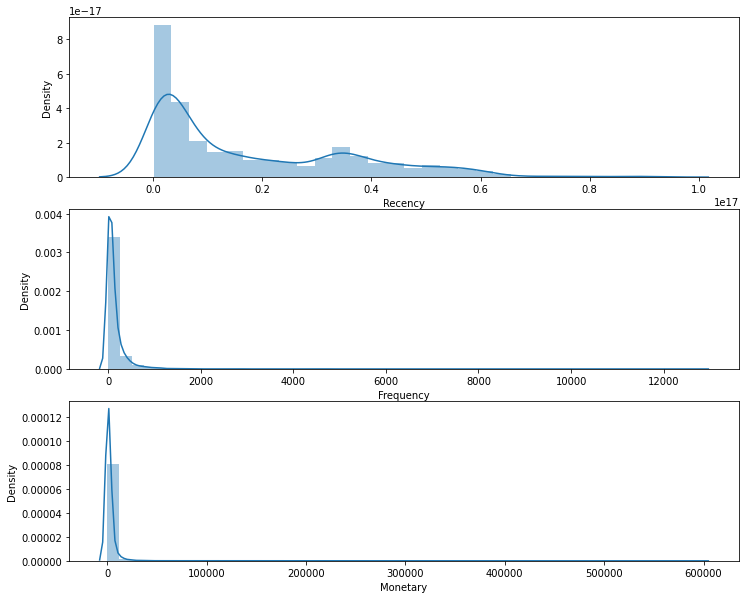

In [40]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'])
# Show the plot
plt.show()

In [41]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Customer ID  5924 non-null   float64        
 1   Monetary     5924 non-null   float64        
 2   Frequency    5924 non-null   int64          
 3   Recency      5924 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 231.4 KB


In [42]:
RFM['Recency'] = RFM['Recency']/np.timedelta64(1,'D')

In [43]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5924 non-null   float64
 1   Monetary     5924 non-null   float64
 2   Frequency    5924 non-null   int64  
 3   Recency      5924 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 231.4 KB


# OUTLIER TREATMENT

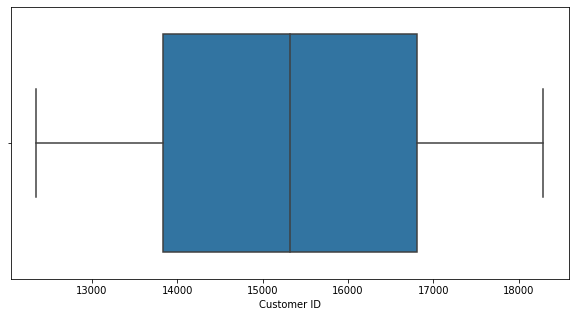

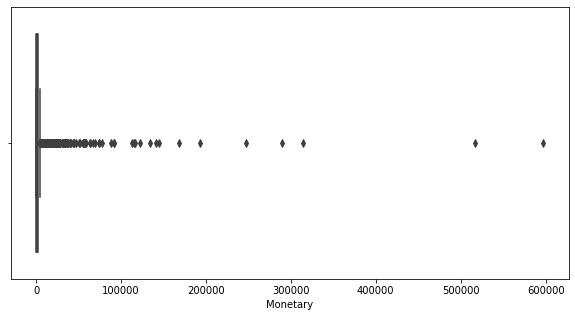

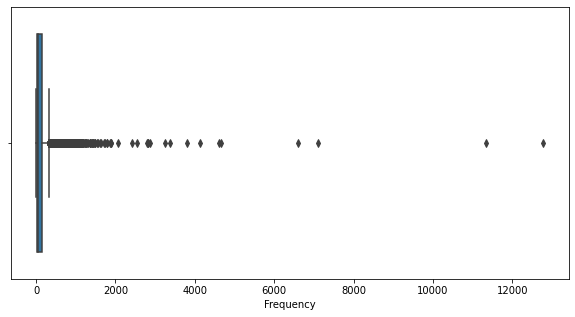

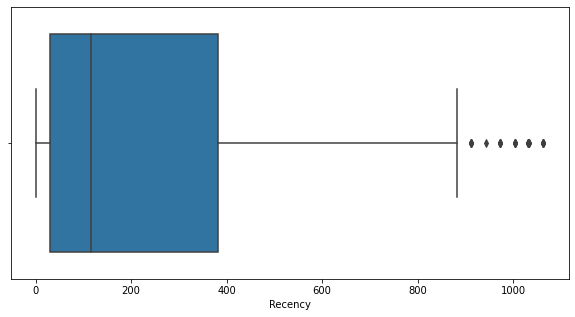

In [44]:
for i in RFM.columns:
    sns.boxplot(RFM[i])
    plt.show()

In [45]:
for i in RFM .columns.drop(["Customer ID"]):
    q1=RFM [i].quantile(0.25)
    q3=RFM [i].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    RFM=RFM[(RFM[i]>ll)&(RFM [i]<ul)] 

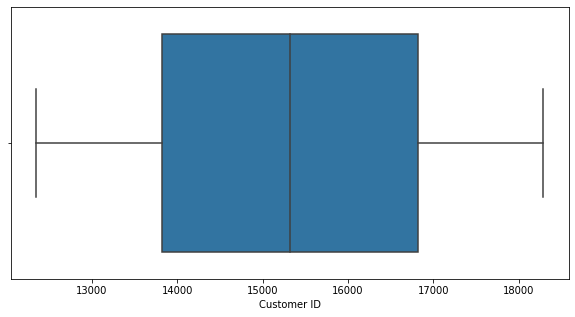

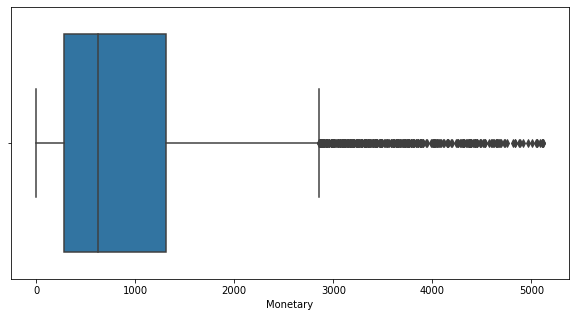

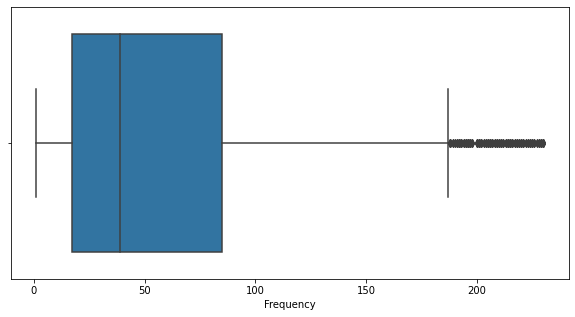

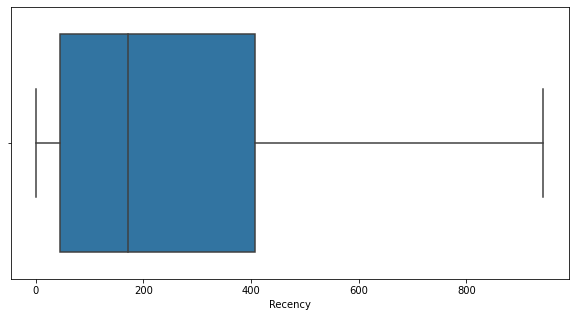

In [46]:
for i in RFM.columns:
    sns.boxplot(RFM[i])
    plt.show()

In [47]:
RFM.shape

(4843, 4)

In [48]:
RFM.head()

,Customer ID,Monetary,Frequency,Recency
2,12348.0,2019.40,51,77.170833
3,12349.0,4428.69,180,20.311111
4,12350.0,334.40,17,312.054167
5,12351.0,300.93,21,377.080556
6,12352.0,2849.84,113,74.097917


# FOR CLUSTERING Scaling IS IMPORTANT

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss=StandardScaler()
df_std=pd.DataFrame(ss.fit_transform(RFM),columns=RFM.columns)
df_std

,Customer ID,Monetary,Frequency,Recency
0,-1.732238,1.041591,-0.132598,-0.752623
1,-1.731656,3.466368,2.238607,-1.017648
2,-1.731075,-0.654240,-0.757567,0.342178
3,-1.730493,-0.687925,-0.684042,0.645269
4,-1.729911,1.877369,1.007051,-0.766946
...,...,...,...,...
4838,1.719853,-0.811595,-0.831093,-0.673764
4839,1.721016,-0.526142,-0.536990,1.447525
4840,1.721598,-0.561045,-0.849474,1.974634
4841,1.722180,0.313974,0.216649,1.116701


In [51]:
df_std.drop(["Customer ID"],axis=1,inplace=True)

# Kmeans clustering

In [52]:
from sklearn.cluster import  KMeans

In [53]:
k_neighbors=np.arange(1,15)
kmeans_clusters=[]

for i in k_neighbors:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_std)
  kmeans_clusters.append(kmeans.inertia_)


In [54]:
kmeans_clusters

[14528.99999999995,
 8018.700965304817,
 5027.933352362218,
 4028.752377321152,
 3480.108443422623,
 3005.714504213428,
 2629.0513543789402,
 2300.4571354350046,
 2082.8016257451463,
 1950.571594199103,
 1812.2482611196488,
 1697.40340094556,
 1589.1293497755041,
 1512.6155303169578]

# ELBOW PLOT  OF N_CLUSTERS VS INERTIA

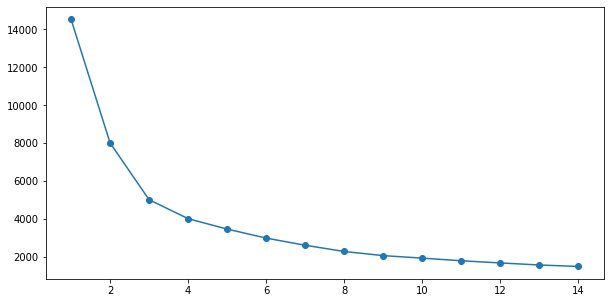

In [55]:
plt.plot(k_neighbors,kmeans_clusters,marker="o")
plt.show()

# n_clusters=3

In [56]:
kmeans=KMeans(n_clusters=3,random_state=10)
kmeans.fit(df_std)

KMeans(n_clusters=3, random_state=10)

In [57]:
predict=kmeans.predict(df_std)

In [58]:
df_kmeans=df_std.copy(deep=True)

In [59]:
df_kmeans.head()

,Monetary,Frequency,Recency
0,1.041591,-0.132598,-0.752623
1,3.466368,2.238607,-1.017648
2,-0.654240,-0.757567,0.342178
3,-0.687925,-0.684042,0.645269
4,1.877369,1.007051,-0.766946


In [60]:
df_kmeans["Labels"]=predict

In [61]:
df_kmeans.head()

,Monetary,Frequency,Recency,Labels
0,1.041591,-0.132598,-0.752623,2
1,3.466368,2.238607,-1.017648,1
2,-0.654240,-0.757567,0.342178,0
3,-0.687925,-0.684042,0.645269,0
4,1.877369,1.007051,-0.766946,1


In [62]:
kmeans.inertia_

5027.906534914035

In [63]:
from sklearn import metrics

In [64]:
metrics.silhouette_score(df_std,df_kmeans.Labels)

0.41853731569908265

In [65]:
# Recency: How recently a customer has made a purchase. 
# Frequency: How often a customer makes a purchase. 
# Monetary Value: How much money a customer spends on purchases.

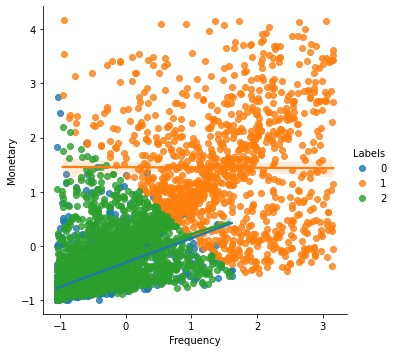

In [66]:
sns.lmplot(x='Frequency', y='Monetary', hue='Labels', data=df_kmeans)
plt.show()

# **Inferecnce:**
#Customer whose frequency is high is often spending more money in purchasing the products
#Customer whose frequency is less is spending less money in purchasing the products.

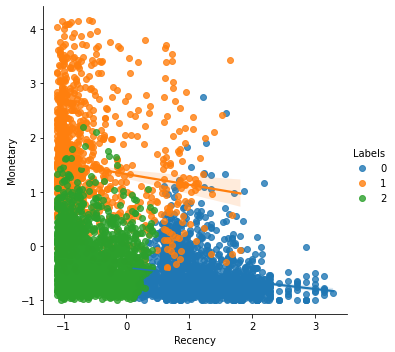

In [67]:
sns.lmplot(x='Recency', y='Monetary', hue='Labels', data=df_kmeans)
plt.show()

# **Inferecnce:**
#Recent customers is spending less money in purchasing the products.

# Customers who purchased back is spending money in less,medium and high level

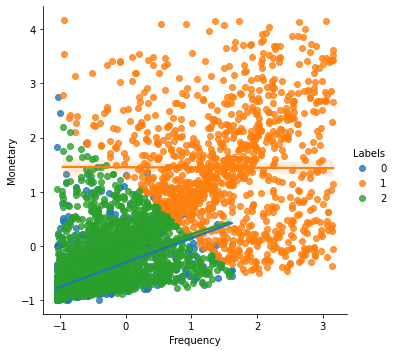

In [68]:
sns.lmplot(x='Frequency', y='Monetary', hue='Labels', data=df_kmeans)
plt.show()

# **Inference** 
# Orange(1) is high level customers 
# Blue(0) is low level customers
# Green(2) is medium level customers.

# **Agglomerative clustering**

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram,cophenet
from scipy.spatial.distance import pdist

# Highest correlation_score is best distance method

In [70]:
Z = linkage(df_std, 'ward')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(df_std))
c

0.6078842872035912

In [71]:
Z = linkage(df_std, 'single')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(df_std))
c

0.47244737934711295

In [72]:
Z = linkage(df_std, 'complete')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(df_std))
c

0.7205283537056859

In [73]:
Z = linkage(df_std, 'average')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(df_std))
c

0.7317153268426396

In [74]:
# Avearage cophenetic distance is best.

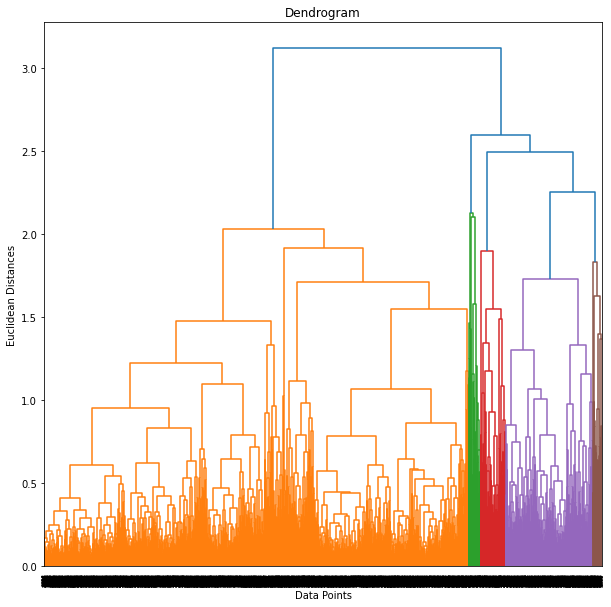

In [75]:
plt.figure(figsize=[10,10])
merg = linkage(df_std, method='average')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster2 = hie_clus.fit_predict(df_std)

df_h = df_std.copy(deep=True)
df_h['label'] = cluster2

In [77]:
metrics.silhouette_score(df_h,df_h.label)


0.48982092358509516

In [78]:
AGC_clusters = df_h.groupby(['label'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)


In [79]:
Df0.shape,Df1.shape

((1157, 4), (3686, 4))

In [80]:
Df0.head()

,Monetary,Frequency,Recency,label
1,3.466368,2.238607,-1.017648,0
4,1.877369,1.007051,-0.766946,0
8,2.233675,0.216649,-1.092267,0
9,3.289438,2.937102,-0.860244,0
12,0.330751,0.492371,-0.916245,0


In [81]:
Df1.head()

,Monetary,Frequency,Recency,label
0,1.041591,-0.132598,-0.752623,1
2,-0.654240,-0.757567,0.342178,1
3,-0.687925,-0.684042,0.645269,1
5,-0.581415,-0.628897,-0.152235,1
6,0.095549,-0.003928,-0.020833,1


In [82]:
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())

In [83]:
C0=C0[:-1]
C0 #High group Customers

array([ 1.32399439,  1.4203393 , -0.65363747])

In [84]:
C1=C1[:-1]
C1 #Low group Customers

array([-0.41558912, -0.44583087,  0.20517052])

In [85]:
AGC_I0=0
AGC_I1=0

for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)

In [86]:
AGC_I0,AGC_I1

(2652.5564348220096, 5495.4234585624545)

In [87]:
AGC_I0+AGC_I1

8147.979893384464

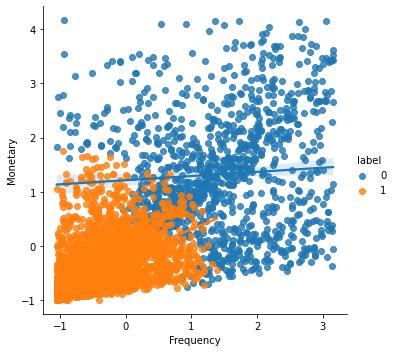

In [88]:
sns.lmplot(x='Frequency', y='Monetary', hue='label', data=df_h)
plt.show()

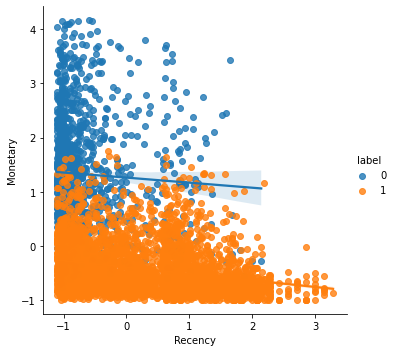

In [89]:
sns.lmplot(x='Recency', y='Monetary', hue='label', data=df_h)
plt.show()

# silhouette score of agglomerative clustering is high and inertia is low caompared to kmeans so agglomerative is good cluster.With the help of that we built  classification models.

In [90]:
x= df_h.drop('label',axis=1)
y= df_h['label']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 

In [92]:
test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [93]:
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
predictValues_train = Dtree.predict(x_train)
predictValues_validate = Dtree.predict(x_test)


In [95]:
print(classification_report(y_train, predictValues_train))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       793
           1       0.98      0.98      0.98      2597

    accuracy                           0.97      3390
   macro avg       0.96      0.96      0.96      3390
weighted avg       0.97      0.97      0.97      3390



In [96]:
print(classification_report(y_test, predictValues_validate))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       364
           1       0.98      0.97      0.98      1089

    accuracy                           0.96      1453
   macro avg       0.95      0.95      0.95      1453
weighted avg       0.96      0.96      0.96      1453



# Good Model f1_score is 96%
# Model has no overfit and underfit.